In [9]:
import pandas as pd
import numpy as np

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df=pd.read_csv('processed_DATA.csv')

In [12]:
df.head()

,Unnamed: 0,member_id,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,purpose moving,purpose other,purpose renewable_energy,purpose small_business,purpose vacation,purpose wedding,initial_list_status w,new col 1,new col 2,new col 3
0,0,58189336,14350,36,19.19,9,2.173275,33.88,0.0,1.000000,...,0,0,0,0,0,0,0,-8.795270,10.548798,524.763280
1,1,70011223,4800,36,10.99,0,2.229502,3.64,0.0,1.000000,...,0,0,0,0,0,0,1,-7.674593,4.378650,229.678036
2,2,70255675,10000,36,7.26,2,2.204565,18.42,0.0,0.000000,...,0,0,0,0,0,0,1,-8.419810,3.836536,269.443872
3,3,1893936,15000,36,19.72,10,2.261209,14.97,0.0,1.259921,...,0,0,0,0,0,0,0,-8.799906,16.937045,543.874986
4,4,7652106,16000,36,10.64,10,2.214437,20.16,0.0,0.000000,...,0,0,0,0,0,0,1,-8.885346,13.193190,412.601503


In [13]:
df.drop(["Unnamed: 0","member_id"],axis=1,inplace=True)

In [14]:
df.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,purpose moving,purpose other,purpose renewable_energy,purpose small_business,purpose vacation,purpose wedding,initial_list_status w,new col 1,new col 2,new col 3
0,14350,36,19.19,9,2.173275,33.88,0.0,1.000000,14.0,1.0,...,0,0,0,0,0,0,0,-8.795270,10.548798,524.763280
1,4800,36,10.99,0,2.229502,3.64,0.0,1.000000,6.0,0.0,...,0,0,0,0,0,0,1,-7.674593,4.378650,229.678036
2,10000,36,7.26,2,2.204565,18.42,0.0,0.000000,5.0,0.0,...,0,0,0,0,0,0,1,-8.419810,3.836536,269.443872
3,15000,36,19.72,10,2.261209,14.97,0.0,1.259921,10.0,0.0,...,0,0,0,0,0,0,0,-8.799906,16.937045,543.874986
4,16000,36,10.64,10,2.214437,20.16,0.0,0.000000,11.0,0.0,...,0,0,0,0,0,0,1,-8.885346,13.193190,412.601503


In [15]:
y=df["loan_status"]

In [16]:
df.drop("loan_status",axis=1,inplace=True)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [18]:
scaler=StandardScaler()

In [19]:
scaler.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
scaled=scaler.transform(df)

In [21]:
scaled

array([[-0.04836375, -0.65439429,  1.35786427, ..., -0.28451847,
         0.00767898,  0.6695925 ],
       [-1.18064133, -0.65439429, -0.51444912, ...,  1.41640047,
        -1.43849105, -1.21246349],
       [-0.56411322, -0.65439429, -1.36612338, ...,  0.2853391 ,
        -1.56555272, -0.95883667],
       ...,
       [ 0.47034981,  1.52813068,  1.72547702, ..., -0.66941479,
        -0.43934481,  1.30305653],
       [ 0.74008086,  1.52813068,  0.69570466, ..., -0.83579322,
         1.43882634,  1.05304677],
       [-0.56411322, -0.65439429, -1.56477126, ...,  0.29300705,
        -0.64566413, -1.06509032]])

In [22]:
df=pd.DataFrame(scaled,columns=df.columns)

In [23]:
df.head()

,loan_amnt,term,int_rate,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,purpose moving,purpose other,purpose renewable_energy,purpose small_business,purpose vacation,purpose wedding,initial_list_status w,new col 1,new col 2,new col 3
0,-0.048364,-0.654394,1.357864,0.860018,-1.561246,1.896234,-0.487717,0.873547,0.468264,2.354345,...,-0.078285,-0.224914,-0.024942,-0.108067,-0.072867,-0.051365,-0.971131,-0.284518,0.007679,0.669592
1,-1.180641,-0.654394,-0.514449,-1.455028,0.029475,-1.746117,-0.487717,0.873547,-1.052517,-0.424747,...,-0.078285,-0.224914,-0.024942,-0.108067,-0.072867,-0.051365,1.029727,1.416400,-1.438491,-1.212463
2,-0.564113,-0.654394,-1.366123,-0.940573,-0.676034,0.034106,-0.487717,-0.862921,-1.242615,-0.424747,...,-0.078285,-0.224914,-0.024942,-0.108067,-0.072867,-0.051365,1.029727,0.285339,-1.565553,-0.958837
3,0.028702,-0.654394,1.478880,1.117246,0.926503,-0.381440,-0.487717,1.324892,-0.292127,-0.424747,...,-0.078285,-0.224914,-0.024942,-0.108067,-0.072867,-0.051365,-0.971131,-0.291555,1.504968,0.791487
4,0.147265,-0.654394,-0.594365,1.117246,-0.396746,0.243686,-0.487717,-0.862921,-0.102029,-0.424747,...,-0.078285,-0.224914,-0.024942,-0.108067,-0.072867,-0.051365,1.029727,-0.421232,0.627476,-0.045776


In [24]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn=KNeighborsClassifier(n_jobs=3)

In [27]:
knn.fit(X_train[:50000],y_train[:50000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=3, n_neighbors=5, p=2,
                     weights='uniform')

In [30]:
y1=[]
for i in range(0,5000):
    t=X_test.iloc[i]
    t1=knn.predict([t],)
    y1.append(t1)
    print("{} {}".format(t1,i))

[1] 0
[1] 1
[0] 2
[0] 3
[1] 4
[0] 5
[0] 6
[0] 7
[0] 8
[0] 9
[0] 10
[0] 11
[0] 12
[1] 13
[0] 14
[1] 15
[0] 16
[0] 17
[0] 18
[1] 19
[1] 20
[0] 21
[0] 22
[1] 23
[1] 24
[0] 25
[0] 26
[0] 27
[1] 28
[0] 29
[0] 30
[0] 31
[0] 32
[0] 33
[1] 34
[0] 35
[1] 36
[0] 37
[0] 38
[0] 39
[0] 40
[0] 41
[0] 42
[0] 43
[0] 44
[0] 45
[0] 46
[0] 47
[0] 48
[0] 49
[0] 50
[0] 51
[0] 52
[0] 53
[0] 54
[0] 55
[0] 56
[0] 57
[0] 58
[1] 59
[0] 60
[0] 61
[0] 62
[0] 63
[0] 64
[0] 65
[0] 66
[0] 67
[1] 68
[0] 69
[0] 70
[0] 71
[0] 72
[0] 73
[0] 74
[0] 75
[0] 76
[0] 77
[0] 78
[0] 79
[0] 80
[0] 81
[1] 82
[0] 83
[0] 84
[0] 85
[0] 86
[1] 87
[0] 88
[0] 89
[0] 90
[0] 91
[0] 92
[0] 93
[0] 94
[0] 95
[0] 96
[0] 97
[0] 98
[0] 99
[0] 100
[0] 101
[0] 102
[1] 103
[0] 104
[0] 105
[1] 106
[0] 107
[0] 108
[0] 109
[0] 110
[0] 111
[1] 112
[0] 113
[1] 114
[0] 115
[0] 116
[0] 117
[0] 118
[0] 119
[1] 120
[0] 121
[0] 122
[1] 123
[0] 124
[0] 125
[1] 126
[0] 127
[1] 128
[0] 129
[0] 130
[0] 131
[0] 132
[0] 133
[0] 134
[0] 135
[0] 136
[0] 137
[0] 13

[0] 1034
[0] 1035
[0] 1036
[0] 1037
[0] 1038
[1] 1039
[0] 1040
[0] 1041
[0] 1042
[0] 1043
[1] 1044
[0] 1045
[0] 1046
[0] 1047
[0] 1048
[0] 1049
[0] 1050
[0] 1051
[0] 1052
[1] 1053
[0] 1054
[0] 1055
[0] 1056
[0] 1057
[0] 1058
[0] 1059
[0] 1060
[0] 1061
[0] 1062
[0] 1063
[0] 1064
[1] 1065
[0] 1066
[0] 1067
[0] 1068
[1] 1069
[0] 1070
[0] 1071
[0] 1072
[0] 1073
[0] 1074
[0] 1075
[1] 1076
[0] 1077
[0] 1078
[1] 1079
[0] 1080
[0] 1081
[0] 1082
[0] 1083
[1] 1084
[0] 1085
[0] 1086
[0] 1087
[0] 1088
[0] 1089
[0] 1090
[0] 1091
[0] 1092
[0] 1093
[0] 1094
[1] 1095
[0] 1096
[0] 1097
[1] 1098
[0] 1099
[1] 1100
[0] 1101
[1] 1102
[1] 1103
[0] 1104
[1] 1105
[0] 1106
[0] 1107
[1] 1108
[1] 1109
[0] 1110
[0] 1111
[0] 1112
[0] 1113
[0] 1114
[0] 1115
[0] 1116
[0] 1117
[0] 1118
[0] 1119
[1] 1120
[0] 1121
[0] 1122
[0] 1123
[0] 1124
[1] 1125
[0] 1126
[0] 1127
[1] 1128
[0] 1129
[1] 1130
[0] 1131
[0] 1132
[0] 1133
[1] 1134
[0] 1135
[0] 1136
[0] 1137
[1] 1138
[0] 1139
[0] 1140
[0] 1141
[0] 1142
[0] 1143
[0] 1144
[

[1] 1946
[1] 1947
[0] 1948
[0] 1949
[0] 1950
[0] 1951
[0] 1952
[0] 1953
[0] 1954
[0] 1955
[0] 1956
[0] 1957
[0] 1958
[0] 1959
[0] 1960
[0] 1961
[0] 1962
[0] 1963
[0] 1964
[0] 1965
[0] 1966
[0] 1967
[0] 1968
[0] 1969
[0] 1970
[1] 1971
[0] 1972
[0] 1973
[0] 1974
[0] 1975
[0] 1976
[0] 1977
[0] 1978
[0] 1979
[0] 1980
[0] 1981
[0] 1982
[0] 1983
[0] 1984
[1] 1985
[0] 1986
[1] 1987
[0] 1988
[0] 1989
[0] 1990
[0] 1991
[0] 1992
[0] 1993
[0] 1994
[0] 1995
[0] 1996
[0] 1997
[0] 1998
[0] 1999
[0] 2000
[1] 2001
[0] 2002
[0] 2003
[0] 2004
[0] 2005
[0] 2006
[0] 2007
[1] 2008
[0] 2009
[0] 2010
[0] 2011
[0] 2012
[0] 2013
[0] 2014
[0] 2015
[0] 2016
[0] 2017
[1] 2018
[0] 2019
[1] 2020
[0] 2021
[1] 2022
[1] 2023
[0] 2024
[0] 2025
[0] 2026
[0] 2027
[0] 2028
[0] 2029
[1] 2030
[0] 2031
[1] 2032
[0] 2033
[0] 2034
[0] 2035
[0] 2036
[0] 2037
[0] 2038
[1] 2039
[0] 2040
[0] 2041
[0] 2042
[1] 2043
[0] 2044
[0] 2045
[0] 2046
[1] 2047
[0] 2048
[0] 2049
[1] 2050
[0] 2051
[0] 2052
[0] 2053
[0] 2054
[0] 2055
[0] 2056
[

[0] 2858
[0] 2859
[0] 2860
[0] 2861
[0] 2862
[0] 2863
[0] 2864
[0] 2865
[0] 2866
[0] 2867
[0] 2868
[0] 2869
[0] 2870
[0] 2871
[0] 2872
[0] 2873
[0] 2874
[0] 2875
[1] 2876
[0] 2877
[0] 2878
[0] 2879
[1] 2880
[0] 2881
[0] 2882
[0] 2883
[0] 2884
[0] 2885
[1] 2886
[0] 2887
[0] 2888
[0] 2889
[0] 2890
[0] 2891
[0] 2892
[0] 2893
[0] 2894
[0] 2895
[0] 2896
[0] 2897
[1] 2898
[1] 2899
[0] 2900
[1] 2901
[0] 2902
[0] 2903
[0] 2904
[0] 2905
[0] 2906
[0] 2907
[1] 2908
[0] 2909
[0] 2910
[0] 2911
[0] 2912
[0] 2913
[0] 2914
[0] 2915
[0] 2916
[0] 2917
[0] 2918
[1] 2919
[0] 2920
[0] 2921
[0] 2922
[0] 2923
[0] 2924
[0] 2925
[0] 2926
[1] 2927
[0] 2928
[0] 2929
[0] 2930
[0] 2931
[0] 2932
[0] 2933
[0] 2934
[0] 2935
[0] 2936
[0] 2937
[0] 2938
[0] 2939
[0] 2940
[1] 2941
[0] 2942
[0] 2943
[0] 2944
[0] 2945
[1] 2946
[0] 2947
[0] 2948
[0] 2949
[0] 2950
[0] 2951
[0] 2952
[0] 2953
[0] 2954
[0] 2955
[0] 2956
[1] 2957
[0] 2958
[0] 2959
[0] 2960
[0] 2961
[0] 2962
[0] 2963
[0] 2964
[0] 2965
[0] 2966
[1] 2967
[0] 2968
[

[1] 3770
[0] 3771
[0] 3772
[0] 3773
[0] 3774
[0] 3775
[0] 3776
[1] 3777
[0] 3778
[0] 3779
[0] 3780
[0] 3781
[0] 3782
[0] 3783
[0] 3784
[0] 3785
[1] 3786
[0] 3787
[0] 3788
[1] 3789
[0] 3790
[0] 3791
[0] 3792
[0] 3793
[1] 3794
[0] 3795
[0] 3796
[0] 3797
[0] 3798
[0] 3799
[0] 3800
[0] 3801
[0] 3802
[0] 3803
[0] 3804
[0] 3805
[0] 3806
[0] 3807
[0] 3808
[0] 3809
[0] 3810
[0] 3811
[0] 3812
[0] 3813
[1] 3814
[0] 3815
[0] 3816
[0] 3817
[0] 3818
[0] 3819
[1] 3820
[1] 3821
[0] 3822
[0] 3823
[0] 3824
[0] 3825
[0] 3826
[0] 3827
[0] 3828
[0] 3829
[0] 3830
[0] 3831
[0] 3832
[0] 3833
[0] 3834
[0] 3835
[0] 3836
[0] 3837
[0] 3838
[0] 3839
[0] 3840
[0] 3841
[0] 3842
[0] 3843
[0] 3844
[0] 3845
[0] 3846
[0] 3847
[0] 3848
[0] 3849
[0] 3850
[0] 3851
[0] 3852
[1] 3853
[0] 3854
[0] 3855
[0] 3856
[0] 3857
[0] 3858
[0] 3859
[0] 3860
[0] 3861
[0] 3862
[1] 3863
[0] 3864
[1] 3865
[1] 3866
[0] 3867
[0] 3868
[0] 3869
[0] 3870
[0] 3871
[0] 3872
[1] 3873
[0] 3874
[0] 3875
[0] 3876
[0] 3877
[0] 3878
[0] 3879
[0] 3880
[

[0] 4682
[0] 4683
[0] 4684
[1] 4685
[0] 4686
[0] 4687
[0] 4688
[0] 4689
[0] 4690
[0] 4691
[0] 4692
[0] 4693
[0] 4694
[0] 4695
[0] 4696
[0] 4697
[0] 4698
[0] 4699
[0] 4700
[1] 4701
[1] 4702
[0] 4703
[1] 4704
[1] 4705
[0] 4706
[1] 4707
[0] 4708
[0] 4709
[0] 4710
[1] 4711
[0] 4712
[0] 4713
[0] 4714
[0] 4715
[0] 4716
[0] 4717
[0] 4718
[0] 4719
[0] 4720
[0] 4721
[0] 4722
[0] 4723
[0] 4724
[0] 4725
[1] 4726
[0] 4727
[0] 4728
[1] 4729
[0] 4730
[0] 4731
[1] 4732
[0] 4733
[0] 4734
[1] 4735
[0] 4736
[0] 4737
[0] 4738
[1] 4739
[0] 4740
[0] 4741
[0] 4742
[1] 4743
[0] 4744
[0] 4745
[1] 4746
[0] 4747
[0] 4748
[1] 4749
[0] 4750
[0] 4751
[0] 4752
[0] 4753
[0] 4754
[0] 4755
[0] 4756
[0] 4757
[0] 4758
[0] 4759
[0] 4760
[0] 4761
[0] 4762
[0] 4763
[1] 4764
[0] 4765
[1] 4766
[0] 4767
[0] 4768
[0] 4769
[0] 4770
[0] 4771
[0] 4772
[0] 4773
[0] 4774
[0] 4775
[0] 4776
[1] 4777
[0] 4778
[0] 4779
[1] 4780
[0] 4781
[0] 4782
[0] 4783
[0] 4784
[0] 4785
[0] 4786
[0] 4787
[0] 4788
[0] 4789
[0] 4790
[0] 4791
[0] 4792
[

In [35]:
from sklearn.metrics import confusion_matrix,classification_report

In [36]:
print(confusion_matrix(y_test[:5000],y1))
print('\n')
print(classification_report(y_test[:5000],y1))

[[3418  367]
 [ 852  363]]


              precision    recall  f1-score   support

           0       0.80      0.90      0.85      3785
           1       0.50      0.30      0.37      1215

    accuracy                           0.76      5000
   macro avg       0.65      0.60      0.61      5000
weighted avg       0.73      0.76      0.73      5000



In [37]:
c=confusion_matrix(y_test[:5000],y1)

In [38]:
(c[0][0]+c[1][1])/(c[0][0]+c[1][1]+c[0][1]+c[1][0])

0.7562

## Hypertuing KNN

In [48]:
e=[]

In [49]:
for i in range(1,70,2):
    knn=KNeighborsClassifier(n_neighbors=i,n_jobs=3)
    knn.fit(X_train[:12000],y_train[:12000])
    print(i)
    pred=knn.predict(X_test[:2500])
    temp=np.mean(pred!=y_test[:2500])
    e.append(temp)
    print(temp)

1
0.3064
3
0.2664
5
0.2536
7
0.2396
9
0.2404
11
0.244
13
0.2384
15
0.236
17
0.2348
19
0.234
21
0.234
23
0.232
25
0.2336
27
0.2324
29
0.2296
31
0.23
33
0.2308
35
0.2272
37
0.2268
39
0.2284
41
0.2292
43
0.2284
45
0.2284
47
0.2316
49
0.234
51
0.234
53
0.234
55
0.2344
57
0.2356
59
0.236
61
0.2384
63
0.2384
65
0.2384
67
0.2404
69
0.2404


Text(0,0.5,'Error')

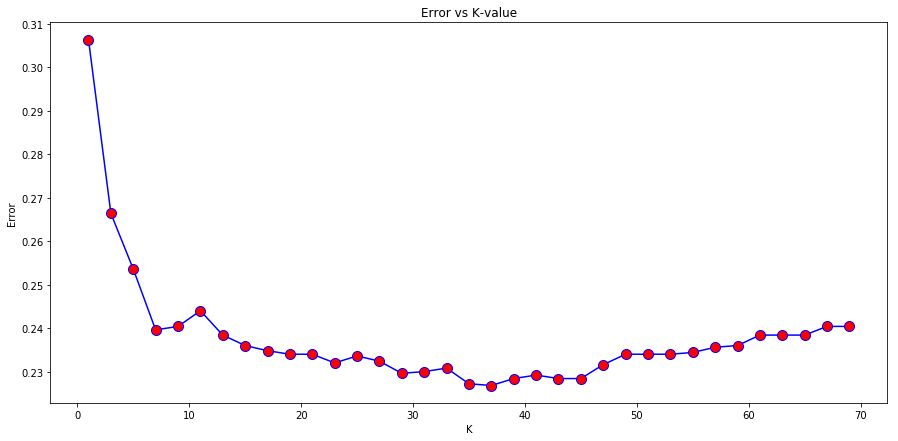

In [50]:
plt.figure(figsize=(15,7))
plt.plot( range(1,70,2) , e , color="blue" , linestyle='-' , marker='o' , markerfacecolor='red' ,
         markersize=10 )
plt.title("Error vs K-value")
plt.xlabel("K")
plt.ylabel("Error")

In [51]:
knn=KNeighborsClassifier(35)

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
params = {"p":[1,2,3,4,5,6],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute']}

In [54]:
grid=GridSearchCV(knn,params,n_jobs=3,verbose=3)

In [56]:
grid.fit(X_train[:4500],y_train[:4500])

Fitting 3 folds for each of 192 candidates, totalling 576 fits


/home/o/tmp/ana/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  2.4min
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:  8.3min
[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed: 28.5min
[Parallel(n_jobs=3)]: Done 506 tasks      | elapsed: 41.9min
[Parallel(n_jobs=3)]: Done 576 out of 576 | elapsed: 46.1min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=35, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=3,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [1, 2, 3, 5], 'p': [1, 2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [57]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=1,
                     weights='distance')

In [58]:
grid.best_params_

{'algorithm': 'auto', 'leaf_size': 1, 'p': 1, 'weights': 'distance'}

In [59]:
grid.best_score_

0.7682222222222223

## KNN tuned

In [60]:
knn=KNeighborsClassifier(35,p=1,weights="distance",n_jobs=3)

In [61]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=3, n_neighbors=35, p=1,
                     weights='distance')

In [62]:
xte=X_test.iloc[0:5000]
yte=y_test.iloc[0:5000]

In [63]:
pred=knn.predict(xte)
pred

array([0, 0, 1, ..., 0, 0, 0])

In [64]:
print(confusion_matrix(yte,pred))
print('\n')
print(classification_report(yte,pred))

[[3678  107]
 [ 877  338]]


              precision    recall  f1-score   support

           0       0.81      0.97      0.88      3785
           1       0.76      0.28      0.41      1215

    accuracy                           0.80      5000
   macro avg       0.78      0.62      0.64      5000
weighted avg       0.80      0.80      0.77      5000



In [65]:
c=confusion_matrix(yte,pred)

In [66]:
(c[0][0]+c[1][1])/(c[0][0]+c[1][1]+c[0][1]+c[1][0])

0.8032